<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837





## Importing Libraries

First we import libraries that we need for this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import any other libraries needed below
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
X, Y = None, None

### START CODE HERE ###
data1 , data2 = pd.read_csv('/content/data_logistic.csv').to_numpy() , pd.read_csv('/content/data2_logistic.csv').to_numpy()
X = np.vstack((data1[:,:3],data2[:,:3]))
Y = np.hstack((data1[:,3],data2[:,3]))
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(20000, 3)
(20000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:

Normalizing data before training a machine learning model is essential for several reasons:

1. **Ensuring Scale Consistency**: Features in the dataset may have different scales. For instance, one feature might range from 0 to 1 while another might range from 1000 to 10000. Large-scale differences can lead to dominance by certain features during training, affecting the model's ability to learn properly. Normalizing the data brings all features to a similar scale, preventing any single feature from dominating the learning process.

2. **Improving Convergence**: Normalization helps optimization algorithms converge faster during the training process. When features are on similar scales, the optimization process is more efficient and less likely to get stuck in local minima or diverge.

3. **Enhancing Model Performance**: Normalization can lead to better model performance. Models trained on normalized data tend to generalize better to unseen data because they are less sensitive to variations in the scale of input features.

4. **Assisting Regularization**: Regularization techniques like L1 and L2 regularization assume that all features are on a similar scale. Normalizing the data ensures that regularization penalties are applied fairly across all features.

Overall, normalizing the data before training helps in achieving better model performance, faster convergence during training, and ensures that the model is robust and generalizes well to unseen data.

In [ ]:
### START CODE HERE ###
sclae = StandardScaler()
X = sclae.fit_transform(X)
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
### START CODE HERE ###
X = np.insert(X,0,1,axis=1)
### END CODE HERE ###

print(X.shape)

(20000, 4)


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1+ np.exp(-Z))
    ### END CODE HERE ###

### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is n-dimensional numpy vector
        X is a m-by-n numpy matrix
        y is an m-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    ### START CODE HERE ###
    loss , y_pred = None , sigmoid((X @ theta.reshape(-1,1)).reshape(-1,))
    loss = -np.mean(np.array([np.log(i) if y[indx] == 1 else np.log(1-i) for indx,i in enumerate(y_pred)]))
    loss += np.linalg.norm(theta,2) ** 2 * (regLambda / 2)
    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})x_{j}^{(i)} + \lambda \theta_j
$$

In [ ]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad , y_pred = np.zeros((n,1)), sigmoid((X @ theta.reshape(-1,1)).reshape(-1,))
    ### START CODE HERE ###
    grad[0] = np.mean(y_pred - y)
    grad[1:] = np.array([np.dot(y_pred - y,x_i) / X.shape[0] +
                         regLambda * theta[indx + 1] for indx,x_i in enumerate(X.T[1:4,:])]).reshape(-1,1)
    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta, loss_history = np.ones((n,1)), np.array([])
    ### START CODE HERE ###
    for _ in range(maxNumIters):
        grad = computeGradient(theta,X,y,regLambda)
        log_loss = computeCost(theta, X, y, regLambda)
        loss_history = np.append(loss_history,log_loss)
        if hasConverged(theta,theta - alpha * grad , epsilon) : break
        theta -= alpha * grad
    if _ == maxNumIters - 1 : print(f'max epoch reached')
    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''
    return np.linalg.norm(theta_new - theta_old) <= epsilon

Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

z = 0.418x0 + -1.265x1 + 1.915x2 + -0.001x3


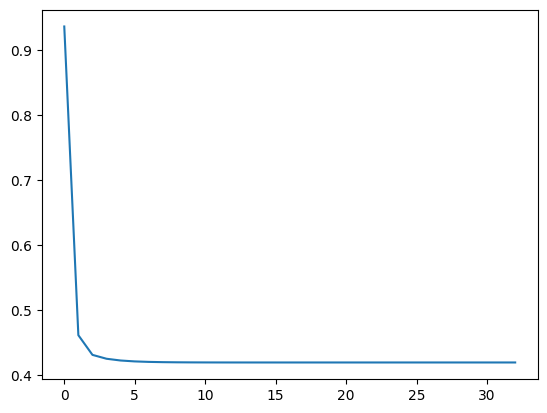

In [ ]:
theta, loss_history = fit(X, Y,0.01,5) # calculating theta and loss of each iteration

### START CODE HERE ###
plt.plot(np.arange(len(loss_history)),loss_history)
equation = 'z = ' + ' + '.join([f'{x:.3f}x{indx}' for indx,x in enumerate(theta[:,0])])
print(equation)
### END CODE HERE ###

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:

### START CODE HERE ###
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, train_size = 0.7 , random_state = 40)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size = 0.667 , random_state = 40)
print(f'X_train shape : {X_train.shape} , X_val shape : {X_val.shape} ,X_test shape : {X_test.shape} ,')
### END CODE HERE ###

X_train shape : (14000, 4) , X_val shape : (4002, 4) ,X_test shape : (1998, 4) ,


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    ### START CODE HERE ###
    Y = sigmoid((X @ theta.reshape(-1,1)).reshape(-1,))
    ### END CODE HERE ###
    return np.array(Y >= 0.5,dtype=np.int32)

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:

The best value for the learning rate is 4.4, while the best value for the regularization term is 0.0101. With these parameters, we can achieve 81.18% accuracy on the validation data and 81.93% on the test data.

#### Learning Rate:

The learning rate determines the size of the steps taken during the optimization process (e.g., gradient descent) to update the model parameters. It essentially controls how quickly or slowly the model learns from the data.

- **High learning rate**: With a high learning rate, the model may converge quickly, but it risks overshooting the optimal solution, leading to oscillations or divergence. In such cases, the model may fail to converge or converge to a suboptimal solution.
  
- **Low learning rate**: A low learning rate means smaller steps during optimization. While this can lead to more stable convergence, it might also result in slow training or getting stuck in local minima.

#### Regularization Constant:

Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. The regularization constant (often denoted as λ) controls the strength of this penalty.

- **High regularization constant**: A high value of the regularization constant imposes a stronger penalty on large parameter values. This tends to result in simpler models with coefficients closer to zero, effectively reducing overfitting. However, too high a regularization constant might lead to underfitting, where the model is too constrained to capture the underlying patterns in the data.

- **Low regularization constant**: Conversely, a low value of the regularization constant imposes a weaker penalty on the parameters, allowing the model to fit the training data more closely. This can lead to better performance on the training data but may increase the risk of overfitting, especially with complex models or limited training data.



best accury = 0.8118440779610195 in validation data with regularization term = 0.0101011 , learning rate = 4.4
accuracy in test data = 0.8193


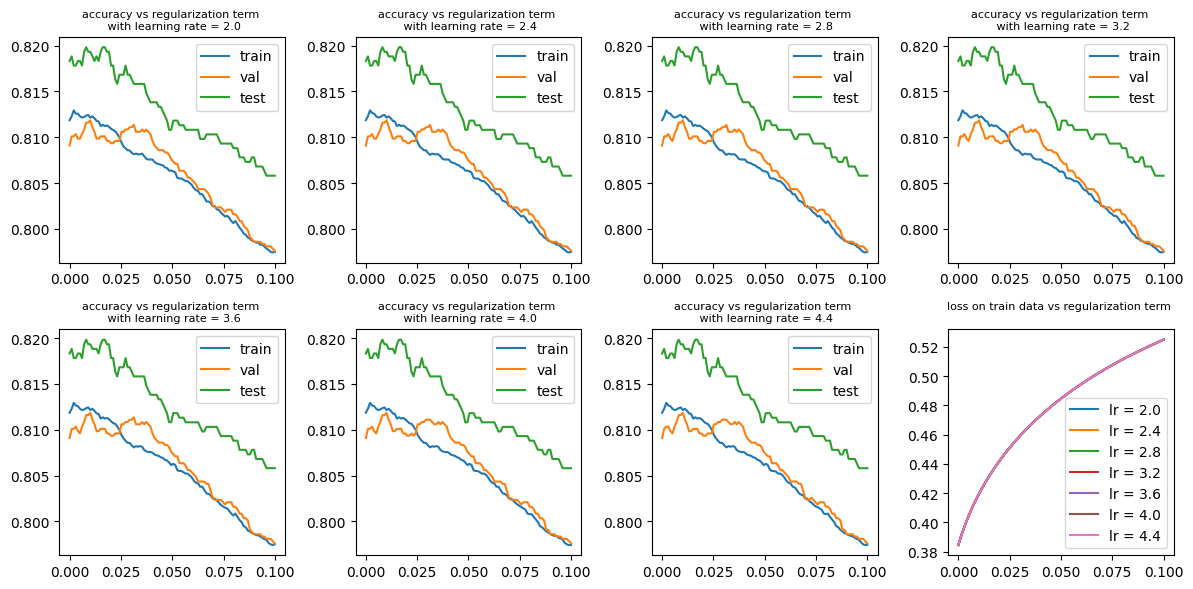

In [ ]:
### START CODE HERE ###
regLambda = np.linspace(1e-7,0.1,100)
learning_rate = np.linspace(2,4.4,7)
best_lr , best_lam , best_acc = 0 , 0, 0
plt.figure(figsize=(12,6))
for indx,lr in enumerate(learning_rate):
    acc_train_history , acc_test_history , acc_val_history = np.array([]) , np.array([]) , np.array([])
    loss_train_history = []
    for lam in regLambda:
        theta, loss_history = fit(X_train, y_train,lam,lr,1e-4,1000)
        y_train_predict , y_val_predict , y_test_predict = predict(X_train,theta) , predict(X_val,theta) , predict(X_test,theta)
        loss_train_history.append(loss_history[-1])
        acc_train_history = np.append(acc_train_history,np.sum(y_train == y_train_predict) / y_train.shape[0])
        acc_val_history = np.append(acc_val_history,np.sum(y_val == y_val_predict) / y_val.shape[0])
        acc_test_history = np.append(acc_test_history,np.sum(y_test == y_test_predict) / y_test.shape[0])
    if np.max(acc_val_history) >= best_acc:
      best_acc , best_lam , best_lr = np.max(acc_val_history) , regLambda[np.argmax(acc_val_history)] , lr
    plt.subplot(2,4,indx+1)
    plt.plot(regLambda,acc_train_history,label='train')
    plt.plot(regLambda,acc_val_history,label='val')
    plt.plot(regLambda,acc_test_history,label='test')
    plt.title(f'accuracy vs regularization term \n with learning rate = {lr:.1f}',fontsize = 8)
    plt.legend()
    plt.subplot(2,4,8)
    plt.plot(regLambda,loss_train_history,label=f'lr = {lr:.1f}')
    plt.title(f'loss on train data vs regularization term \n',fontsize = 8)
    plt.legend()

print(f'best accury = {best_acc} in validation data with regularization term = {best_lam} , learning rate = {best_lr}')
theta, loss_history = fit(X_train, y_train,best_lam,best_lr,1e-4,1000)
print(f'accuracy in test data = {(np.sum(predict(X_test,theta) == y_test) / y_test.shape[0]):.4f}')
plt.tight_layout()
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer** : 70.92 %

In [ ]:
### START CODE HERE ###
clf = GaussianNB()
clf.fit(X_train, y_train)
np.sum(clf.predict(X_test) == y_test) / y_test.shape[0]
### END CODE HERE ###

0.7092092092092092

## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer** : 82.13 %

In [ ]:
### START CODE HERE ###
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
np.sum(clf.predict(X_test) == y_test) / y_test.shape[0]
### END CODE HERE ###

0.8213213213213213

## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:
In these datasets, both logistic regression (with adjusted learning rate and L2 penalty term) and LinearDiscriminantAnalysis perform very well in classifying the data, achieving 81.93% and 82.13% accuracy respectively.